In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [37]:
class GaussSeidel:
  def __init__(self, initialX, A, b, tolerance, maxIterations):
    self.x = initialX
    self.tolerance = tolerance
    self.A = A
    self.b = b
    self.maxIterations = maxIterations

  def gaussSeidel(self):
    # Diagonal matrix
    D = np.diag(self.A)

    # Lower diagonal
    L = np.tril(self.A, -1)

    # Upper diagonal
    U = np.triu(self.A, 1)
    iter = 0

    # Check whether there is a 0.0 in the diagonal of A
    if 0. in D:
      # If so, the jacobi method will not converge
      return np.array([np.NAN]), iter, None, None

    # (L+D)^-1
    inverseLD = np.linalg.inv(L+np.diag(D))

    # -(L+D)^-1
    B = np.asmatrix(-inverseLD) * np.asmatrix(U)

    # (L+D)^-1b
    C = np.asmatrix(inverseLD) * np.asmatrix(self.b)

    # x will initially be a vector with random values
    x = np.random.uniform(size=(np.size(self.b), 1))

    # The new vector x(newX) will be x0(the initial x guess) 
    newX = self.x

    # List of local errors
    # Calculate the infinite norm error value of the initial guess x(x0) and the random vector x
    localErrors = [np.linalg.norm(newX - x, np.inf)]

    # List of x solutions
    xSolutions = [self.x]

    # Start time
    startTime = time.time()
    
    while iter < self.maxIterations and localErrors[iter] > self.tolerance:
      x = newX
      iter += 1

      # Calculate a new x solution
      newX = np.asmatrix(B) * np.asmatrix(x) + np.asmatrix(C)

      # Add the local error to the list of local errors
      localErrors.append(np.linalg.norm(newX - x, np.inf))
      
      # Add the new solution x to the list of solutions
      xSolutions.append(newX)

    x = newX
    xSolutions.append(x)

    # End time
    endTime = time.time()
    print(f'Completed at {endTime - startTime} \n')

    return xSolutions, iter, localErrors, x
  
  # Plot the local erros
  def plotError(self, error):
    figure = plt.figure(1)
    plt.title("Error")
    plt.plot(error[1:])
    plt.grid()
    plt.show()

Completed at 0.0006809234619140625 

X Solutions: 
[0.][0.][0.]
[[1.]][[0.71428571]][[1.03174603]]
[[1.03968254]][[1.01473923]][[0.98954397]]
[[0.99685059]][[0.99656265]][[1.0010818]]
[[1.00056489]][[1.00038978]][[0.99983116]]
[[0.99993017]][[0.99994178]][[1.00002199]]
[[1.00001003]][[1.00000771]][[0.99999692]]
[[0.99999865]][[0.99999893]][[1.00000042]]
[[1.00000019]][[1.00000015]][[0.99999994]]
[[0.99999997]][[0.99999998]][[1.00000001]]
[[1.]][[1.]][[1.]]
[[1.]][[1.]][[1.]]
[[1.]][[1.]][[1.]]
The solution to Ax=b is [[1.]
 [1.]
 [1.]]
The maximum iteration for the jacobi method is 11
The error is 3.9889365144318845e-09


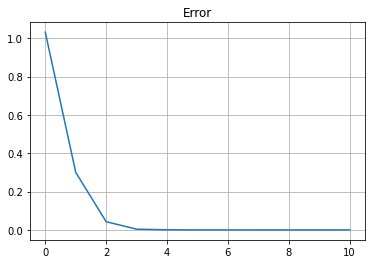

In [39]:
# A matrix
A = np.array([
    [8, 1, -1],
    [1, -7, 2],
    [2, 1, 9]
])

# Tolerance value
tolerance = 1e-8

# Initial x vector
initialX = np.array([0., 0., 0.])
initialX = initialX[:, np.newaxis]

# b vector
b = np.array([8, -4, 12])
b = b[:, np.newaxis]

gaussSeidel = GaussSeidel(initialX, A, b, tolerance, 20)
xSolutions, iter, errors, X = gaussSeidel.gaussSeidel()

# Print all the solutions for every iteration
print("X Solutions: ")
# For every x solution
for x in xSolutions:
  # For every element in the x solution
  for elem in x:
    print(f'{elem}', end="")
  print()

# Print the solution to the Ax=b
print(f'\nThe solution to Ax=b is \n{X}')

# Print the maximum iteration the jacobi method has reached
print(f'\nThe maximum iteration for the jacobi method is {iter}')

# Print the error
print(f'\nThe error is {errors[-1]}')

# Graph the errors
gaussSeidel.plotError(errors)